
## About this project

We want a csv with data about most sold products in amazon, because we want to check in another websites if this products are cheaper and we can re-sell in amazon. To do this, we need specific information like the product model,brand,price, merchants, how often is sold, etc.

I will scrap in a specific main category of products (I already know some other sites selling this products with cheaper prices :D ). 

Technologies used:
- Selenium
- BeautifulSoup (utils.py)
- Pandas

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from selenium import webdriver
import pandas as pd
import time
import random
import sys
import os
sys.path.append(os.path.abspath('../'))
from utils import (soup_content_from_url,
                    elements_from_soup_bestsellers_web, 
                    subcategories_from_bestsellers_web,
                    detail_dict_from_product_page,
                    load_obj,
                    save_obj)

# EDA

Estadisticos:
* Describe district
* 

In [100]:
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('out.csv')
df.head(3)

,ref_id,neighborhood,district,province,price,currency,amount,url,description,totalArea,floorArea,bedrooms,bathrooms,garage,owner,source_web,recent_id,scrapped_date
0,inmueble-26421-1,viamonte 2901,Chacras de Coria,Mendoza,$ 21.000.000,$,21000000.0,https://www.inmoclick.com.ar/26421-jorge-scagl...,se vende casa a estrenar AGOSTO 2020 en zona d...,750,320,5,3,NaN,Dueño Directo,inmoclick,1,2020-05-19 18:50:41.713835
1,inmueble-5870-17,Barrio Alto Terrada,Carrodilla,Mendoza,US$ 178.000,US$,178000.0,https://www.inmoclick.com.ar/5870-hernan-gabri...,Casa a estrenar en Barrio privado Alto Terrada...,350,200,3,3,NaN,Dueño Directo,inmoclick,2,2020-05-19 18:50:41.713835
2,inmueble-11248-2608,RINCON DE DRUMOND,Lujan de Cuyo,Mendoza,US$ 125.000,US$,125000.0,https://www.inmoclick.com.ar/11248-openhouse-n...,OPENHOUSE OPORTUNIDAD UNICA !!! CASA EN VENTA ...,300,140,3,3,NaN,OPENHOUSE Negocios Inmobiliarios,inmoclick,3,2020-05-19 18:50:41.713835


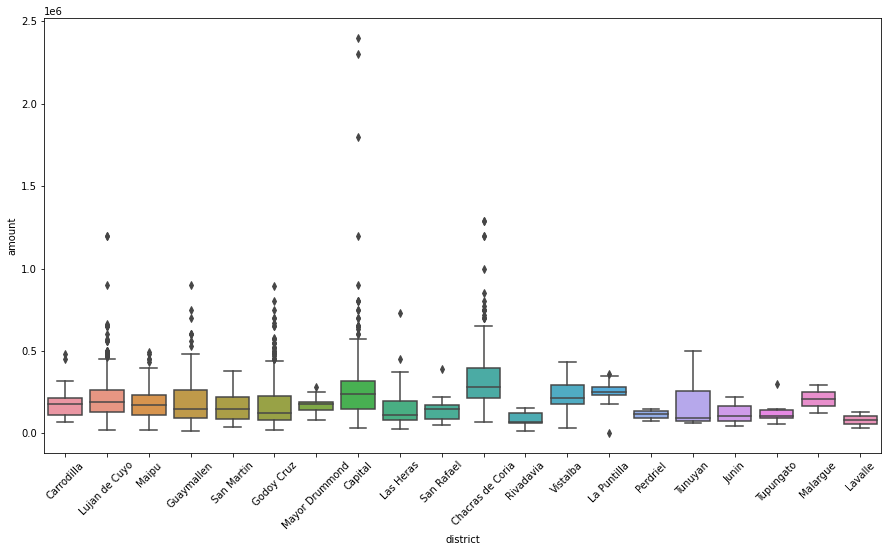

In [7]:
plt.figure(figsize=(15,8))
g = sns.boxplot(x=df[df.currency=='US$']['district'], y=df['amount'])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

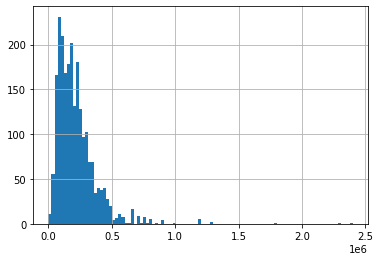

In [158]:
df[df.currency=='US$'].amount.hist(bins=100)

In [21]:
import numpy as np
#df[np.logical_and(df['amount']<30000,df['amount']>0)].sort_values(by='amount')
df[df.description.str.contains("2018")].description

34      Gold Group Argentina® vende!!\nEstupenda casa ...
43      CASA TOTALMENTE RECICLADA 2018.\nPropiedad ubi...
75      Gold Group Argentina® Vende!!\nConfortable cas...
76      Gold Group Argentina® Vende!!\nOportunidad!!\n...
77      Gold Group Argentina® vende!!\nMagnífica casa ...
                              ...                        
3043    COCUCCI INMOBILIARIA VENDE CASA EN BARRIO PRIV...
3079    COCUCCI INMOBILIARIA VENDE: CASA RUSTICA, SOBR...
3089    COCUCCI INMOBILIARIA VENDE HERMOSA CASA EN EL ...
3123    Gold Group Vende!\nEstupenda quinta emplazada ...
3175    GOLD GROUP ARGENTINA® VENDE!!\nMARAVILLOSA CAS...
Name: description, Length: 158, dtype: object

In [22]:
str(df[df.index==3175].url.values)

"['https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/939/ficha/casa-en-venta-en-rincon-de-araoz-lujan-de-cuyo?btid=2465480']"

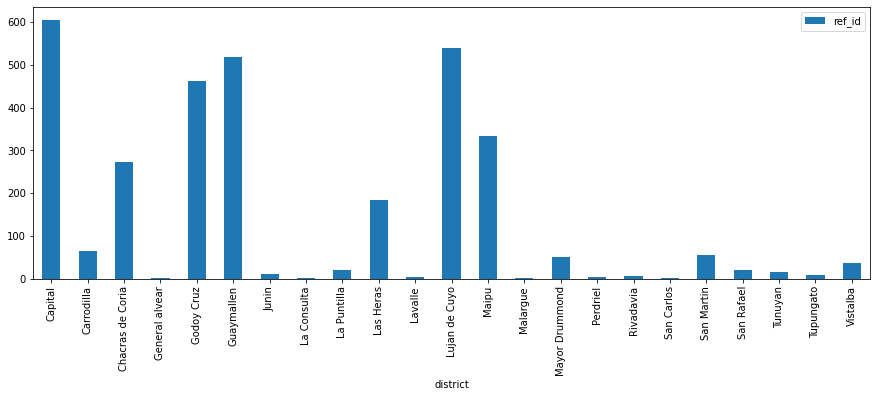

In [177]:
df.groupby('district').count().plot.bar(y='ref_id',figsize=(15,5))

In [33]:
dfdol = df[df.currency=='US$'].reset_index(drop=True)
dfdol['r_10'] = round(dfdol.recent_id/100)
h = dfdol.groupby('r_10').mean()
#pd.pivot_table(h,values,index='r_10',columns,aggfunc)

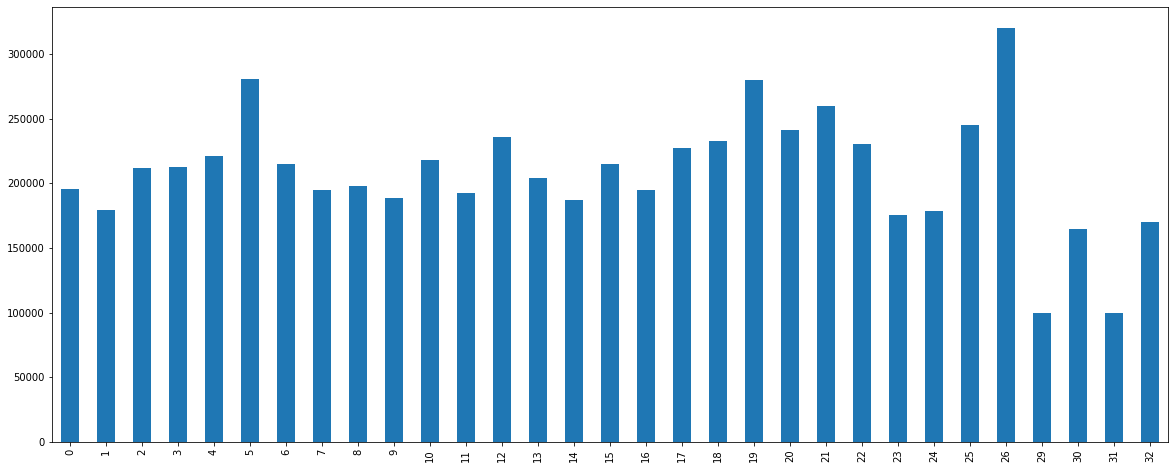

In [34]:
plt.figure(figsize=(20,8))
h.index = h.index.astype(int)
h['amount'].plot.bar()

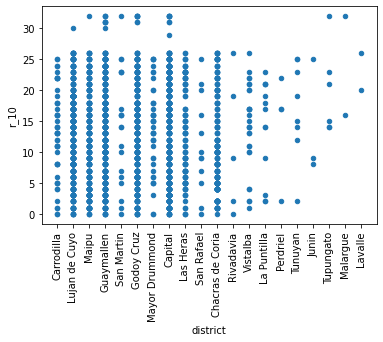

In [42]:
dfdol.plot.scatter(x='district',y='r_10',rot=90)

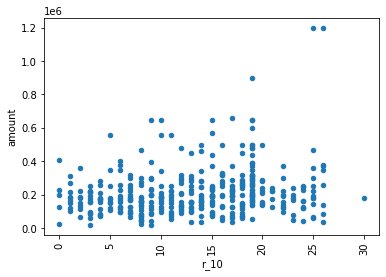

In [46]:
dfdol[dfdol.district=='Lujan de Cuyo'].plot.scatter(x='r_10',y='amount',rot=90)

In [68]:
import numpy as np
pd.set_option('display.max_columns', 30)
list(dfdol[dfdol['r_20']==3].url)

['https://www.inmoclick.com.ar/71779-greenwood/inmuebles/82/ficha/casa-en-venta-en-acceso-este-y-arturo-gonzalez?btid=2465480',
 'https://www.inmoclick.com.ar/71779-greenwood/inmuebles/84/ficha/casa-en-venta-en-juan-agustin-maza-y-azcuenaga?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1479/ficha/casa-en-venta-en-b0-privado-bucci-bandera-de-los-andes-y-rosario?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1500/ficha/casa-en-venta-en-laguna-horcones-1054-barrio-fuchs?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1508/ficha/casa-en-venta-en-vicente-gil-539?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1515/ficha/casa-en-venta-en-rufino-ortega-y-martinez-de-rozas?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1518/ficha/casa-en-venta-en-p-benegas-691?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-g

In [175]:
df2 = df[df['totalArea']!='disable']
df2.totalArea = df2.totalArea.str.replace('mts2','').str.replace('m2','').str.replace('m','')
df2.totalArea = df2.totalArea.str.strip()
df2 = df2[~df2['totalArea'].str.contains('2.852.61')]
df2.totalArea = df2['totalArea'].str.replace(',','.')

In [176]:
df2.totalArea = df2.totalArea.astype(float)

In [177]:
df2.floorArea[df2.floorArea.str.contains('\,')]

295     301,24m2
1142     57,78m2
1144     80,00m2
1204    411,00m2
1427    69,10 m2
1475    65,83 m2
1484       334,3
1675       97,15
1759    453,85m2
1760    258,32m2
1800      135,53
2006      170,47
2083    221,50m2
3038       483,6
3074      299,35
3089    313,58m2
Name: floorArea, dtype: object

In [178]:
df2 = df2[df2['floorArea']!='disable']
df2 = df2[df2['floorArea']!='140/60']
df2.floorArea = (df2.floorArea.str.replace('mts2','')
                             .str.replace('m2','')
                             .str.replace('m','')
                             .str.replace('aprox.con cocher','')
                             .str.replace('aprox.','')
                             .str.replace(',',''))
df2.floorArea = df2.floorArea.astype(float)

In [179]:
df2.loc[df2['totalArea'] >= 4000,'totalArea']=4000

In [205]:
chacras = df2[np.logical_and(df2['district']=='Chacras de Coria',df2.currency=='US$')]

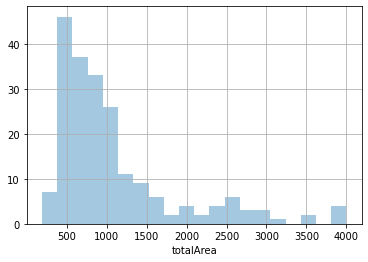

In [232]:
import seaborn as sns
g = sns.distplot(chacras.totalArea,bins=20,kde=False)
g.grid()

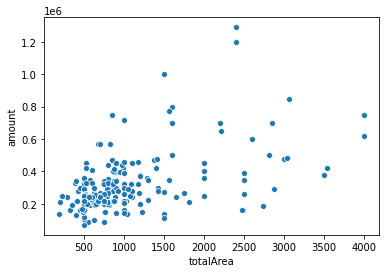

In [208]:
sns.scatterplot(x="totalArea", y="amount", data=chacras)

In [230]:
chacras['amountr'] = pd.qcut(chacras.amount,5)

/home/chanchus/developments/amz-scrapper/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


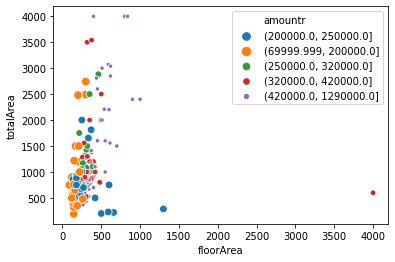

In [231]:
sns.scatterplot(x="floorArea", y="totalArea",hue="amountr", size="amountr", data=chacras)

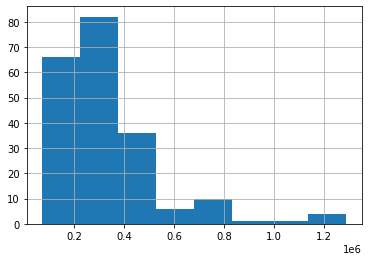

In [217]:
chacras.amount.hist(bins=8)

In [2]:
import pandas as pd

In [5]:
df1 = pd.DataFrame([['Buenos Aires',63,16,89,55],
				['Atlanta',17,29,81,17],
				['Brasil',88,82,9, 64]])
df1.columns=['Airport','A','B','C','D']
df1 = df1.set_index('Airport')

df2 = pd.DataFrame([['Buenos Aires',21,38,36],
		['Atlanta',54,88,80],
		['Brasil',44,53,53],
		['Madrid',24,58,29]])
df2.columns=['Airport','B','C','D']
df2 = df2.set_index('Airport')


,B,C,D
Airport,,,
Buenos Aires,21,38,36
Atlanta,54,88,80
Brasil,44,53,53
Madrid,24,58,29


In [6]:
df1.merge(df2, left_index=True,right_index=True)

,A,B_x,C_x,D_x,B_y,C_y,D_y
Airport,,,,,,,
Buenos Aires,63,16,89,55,21,38,36
Atlanta,17,29,81,17,54,88,80
Brasil,88,82,9,64,44,53,53
